# Tarea 2

### Imports

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm;
import numpy as np

### Pregunta 1

In [7]:
# Define parameters for the walk
dims =  2
step_n = 10000
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))

# Simulate steps in 2D
step_shape = (step_n, dims)
steps = np.random.choice(a=step_set, size=step_shape)

In [8]:
steps

array([[ 1, -1],
       [ 0,  0],
       [ 0,  1],
       ...,
       [ 1,  1],
       [ 1,  0],
       [-1,  1]])

In [9]:
path = np.concatenate([origin, steps]).cumsum(0)
#([0,0],[sumx,sumy])
start = path[:1]
#([0,0])
stop = path[-1:]
#([sumx,sumy])
print(stop)

#------------------------------------------------------------------------------------------------

# Define la función de evaluación que calcula la distancia euclidiana al punto de destino
def evaluacion(x, y, x_destino, y_destino):
    distancia = np.sqrt((x - x_destino)**2 + (y - y_destino)**2)
    return -distancia  # Se usa el signo negativo para maximizar la cercanía al destino

# Función para mover el robot a una posición vecina
def mover(robot, step):
    return robot + step

# Algoritmo de Hill Climbing
def hill_climbing(robot, steps, step_size, x_destino, y_destino, umbral):
    for i, step in enumerate(steps):
        evaluacion_actual = evaluacion(robot[0], robot[1], x_destino, y_destino)
        robot_vecino = mover(robot, step * step_size)
        evaluacion_vecino = evaluacion(robot_vecino[0], robot_vecino[1], x_destino, y_destino)
        
        if evaluacion_vecino > evaluacion_actual:
            robot = robot_vecino
            print(f'Iteración {i}: Nueva posición: {robot}, Evaluación: {evaluacion_vecino}')
            
            # Verificar si el robot está lo suficientemente cerca del destino
            distancia_al_destino = np.sqrt((robot[0] - x_destino)**2 + (robot[1] - y_destino)**2)
            if distancia_al_destino < umbral:
                print('El robot ha llegado al destino.')
                break
    
    return robot

# Posición inicial del robot
robot_inicial = np.array([0.0, 0.0])

# Especifica el punto de destino
x_destino = stop[0][0]
y_destino = stop[0][1]

# Parámetros
step_size = 1
umbral = 0.1  # Umbral de distancia al destino para considerar que ha llegado

# Ejecutar el algoritmo de Hill Climbing
posicion_final = hill_climbing(robot_inicial, steps, step_size, x_destino, y_destino, umbral)

print(f'Posición final del robot: {posicion_final}')

[[-43.  76.]]
Iteración 2: Nueva posición: [0. 1.], Evaluación: -86.45229898620394
Iteración 5: Nueva posición: [1. 2.], Evaluación: -86.09297300012354
Iteración 9: Nueva posición: [0. 2.], Evaluación: -85.58621384311844
Iteración 11: Nueva posición: [-1.  2.], Evaluación: -85.0881895447306
Iteración 13: Nueva posición: [0. 3.], Evaluación: -84.72307831990054
Iteración 14: Nueva posición: [1. 4.], Evaluación: -84.38009243891595
Iteración 18: Nueva posición: [2. 5.], Evaluación: -84.05950273467003
Iteración 21: Nueva posición: [1. 5.], Evaluación: -83.52843827104634
Iteración 24: Nueva posición: [1. 6.], Evaluación: -82.68010643437755
Iteración 25: Nueva posición: [1. 7.], Evaluación: -81.83520025025906
Iteración 26: Nueva posición: [2. 8.], Evaluación: -81.54140052758476
Iteración 28: Nueva posición: [2. 9.], Evaluación: -80.7093550959243
Iteración 30: Nueva posición: [ 3. 10.], Evaluación: -80.44874144447506
Iteración 32: Nueva posición: [ 2. 10.], Evaluación: -79.88116173416608
Itera

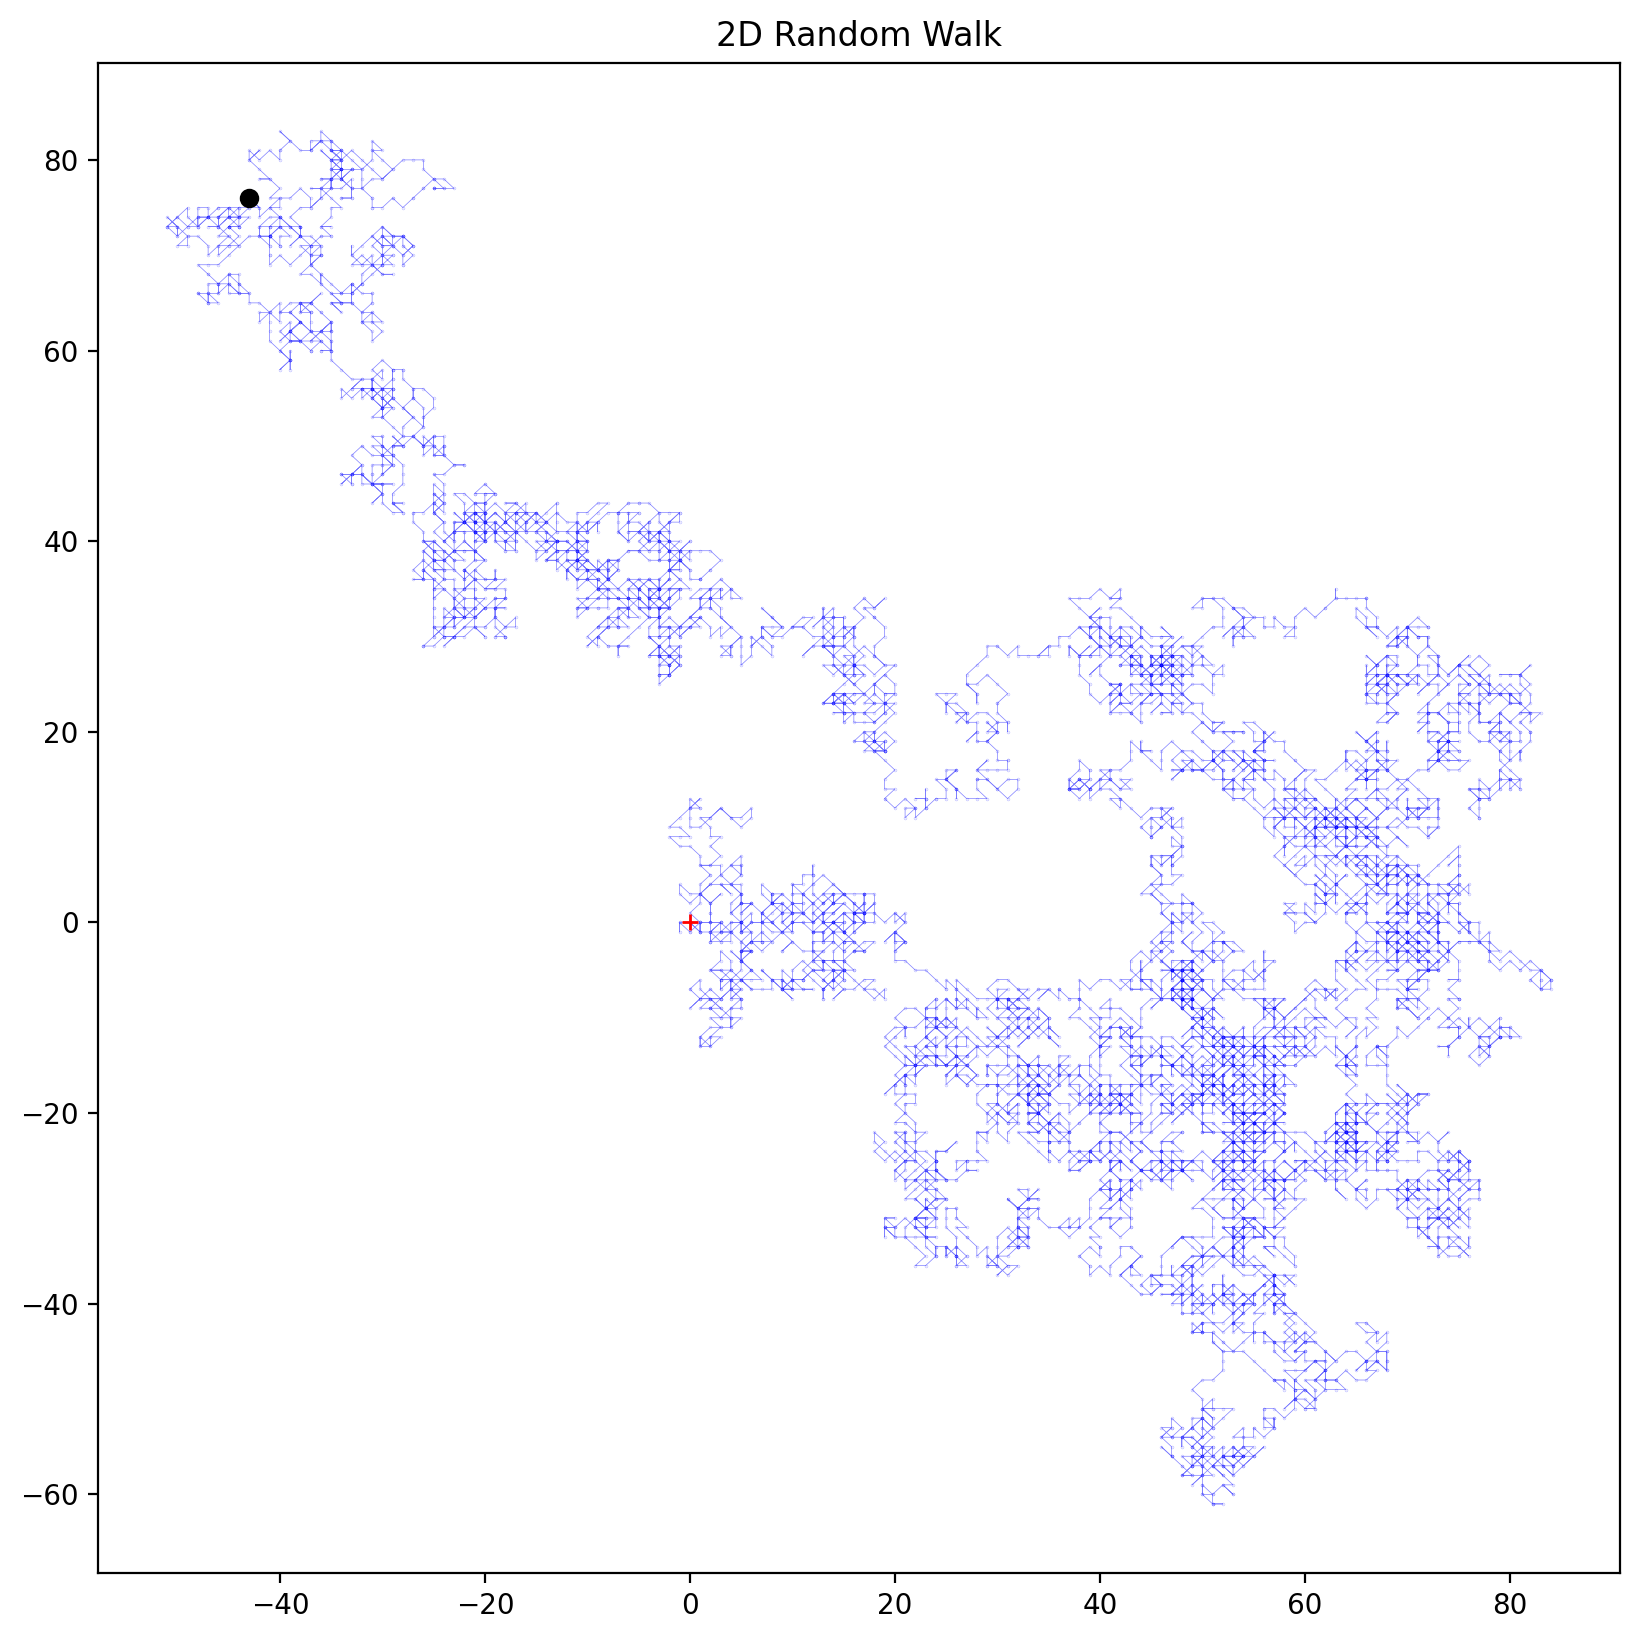

In [10]:
# Plot the path
fig = plt.figure(figsize=(8,8),dpi=200)
ax = fig.add_subplot(111)
ax.scatter(path[:,0], path[:,1],c='blue',alpha=0.25,s=0.05);
ax.plot(path[:,0], path[:,1],c='blue',alpha=0.5,lw=0.25,ls='-');
ax.plot(start[:,0], start[:,1],c='red', marker='+')
ax.plot(stop[:,0], stop[:,1],c='black', marker='o')

plt.title('2D Random Walk')
plt.tight_layout(pad=0)

### Pregunta 2

In [11]:
import numpy as np

# Datos de entrada y salida
#X = np.array([[0.2, 0.4, 0.3, 0.1],  # Ejemplo 1: Distancias a los puntos cardinales
#              [0.1, 0.3, 0.2, 0.4],  # Ejemplo 2
#              [0.4, 0.2, 0.1, 0.3],  # Ejemplo 3
#              [0.3, 0.1, 0.4, 0.2]])  # Ejemplo 4

# Para que sea aleatorio

X = np.random.rand(4, 4)

# Las salidas son codificadas como [Norte, Sur, Este, Oeste]
y = np.array([[1, 0, 0, 0],  # Ejemplo 1: Caminar al norte
              [0, 1, 0, 0],  # Ejemplo 2: Caminar al sur
              [0, 0, 1, 0],  # Ejemplo 3: Caminar al este
              [0, 0, 0, 1]])  # Ejemplo 4: Caminar al oeste

# Inicialización de pesos y sesgos
# np.random.seed(1)
weights = 2 * np.random.random((4, 4)) - 1

# Hiperparámetros
learning_rate = 0.1

# Entrenamiento de la red neuronal usando la regla de Widrow-Hoff
for i in range(10000):
    for j in range(len(X)):
        input_layer = X[j]
        output_layer = y[j]

        # Calcular la salida de la red
        y_predicted = 1 / (1 + np.exp(-np.dot(input_layer, weights)))

        # Actualizar los pesos usando la fórmula de Widrow-Hoff
        delta_weights = learning_rate * (output_layer - y_predicted) * y_predicted * (1 - y_predicted) * input_layer
        weights += delta_weights

# Predicción
predictions = []
for i in range(len(X)):
    input_layer = X[i]
    y_predicted = 1 / (1 + np.exp(-np.dot(input_layer, weights)))
    predictions.append(y_predicted)

print("Resultados después del entrenamiento:")
for i, prediction in enumerate(predictions):
    print(f"Ejemplo {i + 1}: {prediction}")

Resultados después del entrenamiento:
Ejemplo 1: [0.27080157 0.26090695 0.36665107 0.18186391]
Ejemplo 2: [0.21967965 0.22535629 0.28284619 0.11385652]
Ejemplo 3: [0.28552289 0.28484812 0.31624126 0.16360204]
Ejemplo 4: [0.26216934 0.23124184 0.45916875 0.15910365]


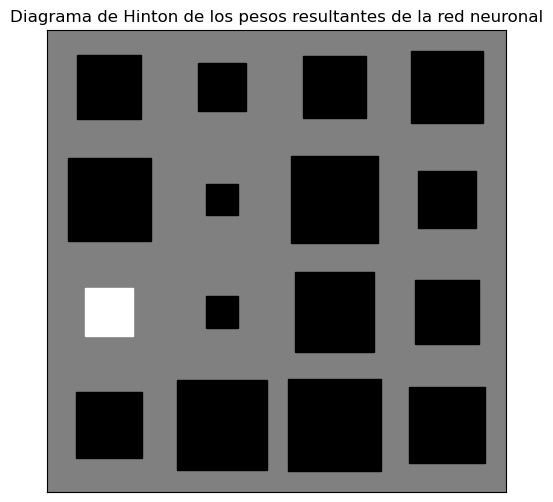

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que 'weights' contiene los pesos resultantes de la red.
# Asegúrate de haber entrenado la red antes y almacenado los pesos en esta variable.

# Función para generar un diagrama de Hinton
def hinton(matrix, max_weight=None, ax=None):
    if not ax:
        ax = plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(np.abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()

# Crear un nuevo gráfico y mostrar el diagrama de Hinton
plt.figure(figsize=(8, 6))
hinton(weights)
plt.title("Diagrama de Hinton de los pesos resultantes de la red neuronal")
plt.show()
